<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 156.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 157.2 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_299/4091649661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')


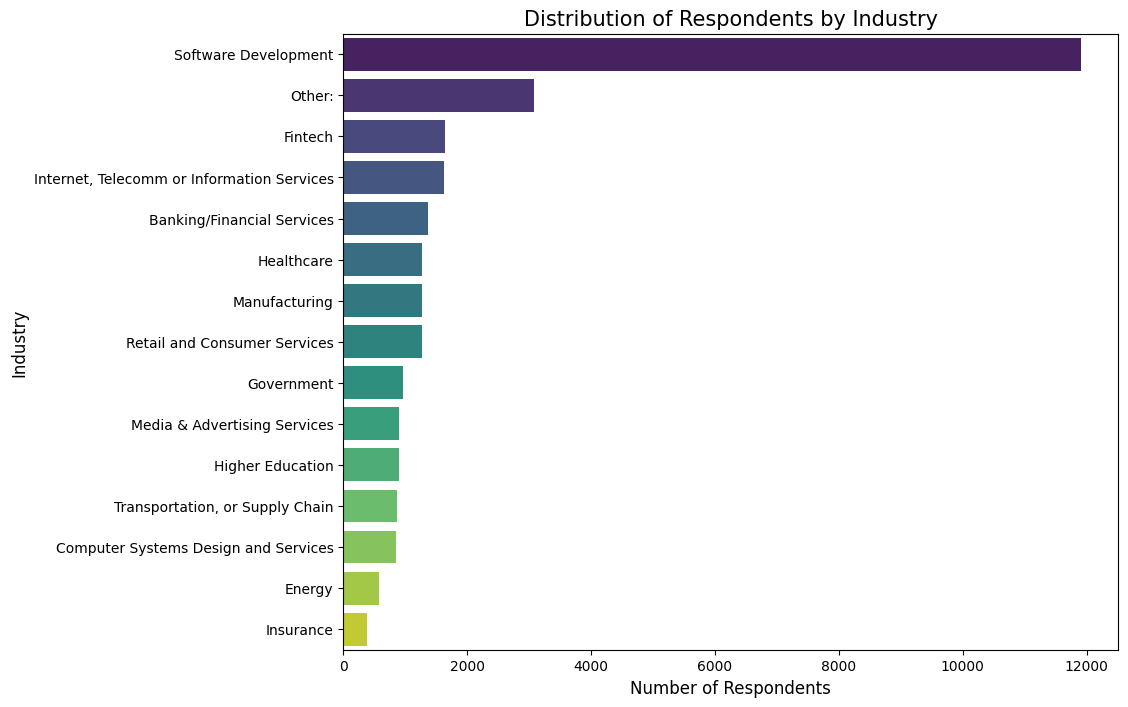

In [3]:
##Write your code here
industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')

plt.title('Distribution of Respondents by Industry', fontsize=15)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Industry', fontsize=12)

plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


Mean Compensation: $86,155.29
Median Compensation: $65,000.00
Standard Deviation: $186,756.97
Outlier Threshold (Mean + 3 STD): $646,426.21
Number of outliers identified: 89


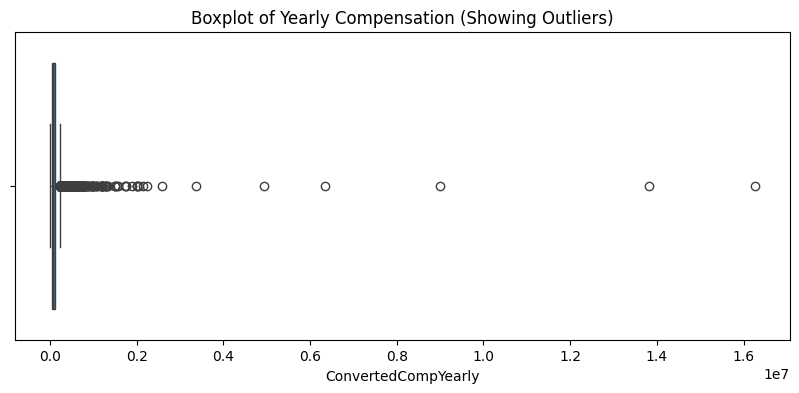

In [4]:
##Write your code here
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: ${mean_comp:,.2f}")
print(f"Median Compensation: ${median_comp:,.2f}")
print(f"Standard Deviation: ${std_comp:,.2f}")

threshold = mean_comp + (3 * std_comp)
print(f"Outlier Threshold (Mean + 3 STD): ${threshold:,.2f}")

outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"Number of outliers identified: {len(outliers)}")

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Boxplot of Yearly Compensation (Showing Outliers)')
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th Percentile): $32,712.00
Q3 (75th Percentile): $107,971.50
IQR: $75,259.50
Lower Bound: $-80,177.25
Upper Bound: $220,860.75

Number of outliers detected using IQR: 978


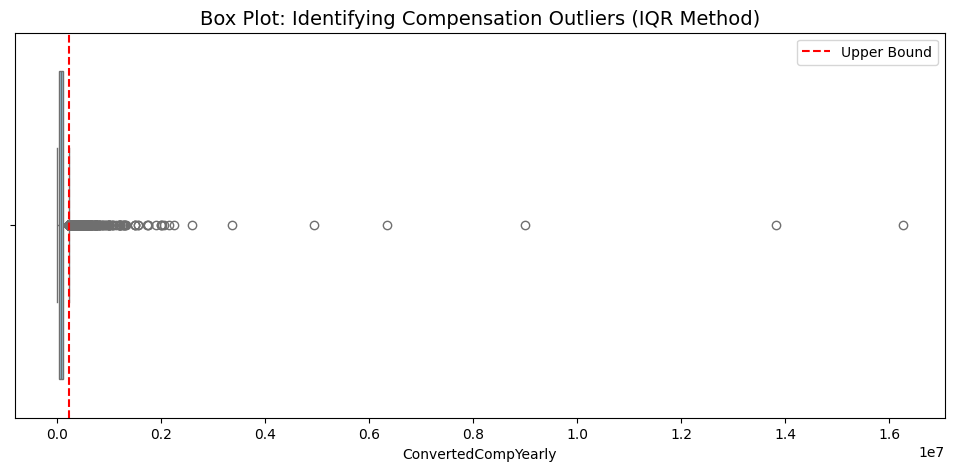

In [5]:
##Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th Percentile): ${Q1:,.2f}")
print(f"Q3 (75th Percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower Bound: ${lower_bound:,.2f}")
print(f"Upper Bound: ${upper_bound:,.2f}")

outliers_iqr = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"\nNumber of outliers detected using IQR: {len(outliers_iqr)}")

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.title('Box Plot: Identifying Compensation Outliers (IQR Method)', fontsize=14)
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

original_count = len(df)
new_count = len(df_no_outliers)
removed_count = original_count - new_count

print(f"Validation Summary:")
print(f"-------------------")
print(f"Original Row Count: {original_count}")
print(f"New Row Count:      {new_count}")
print(f"Rows Removed:       {removed_count}")

print(f"New Max Compensation: ${df_no_outliers['ConvertedCompYearly'].max():,.2f}")

Validation Summary:
-------------------
Original Row Count: 65437
New Row Count:      22457
Rows Removed:       42980
New Max Compensation: $220,207.00


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [7]:
##Write your code here
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].map(age_mapping)

print(df_no_outliers[['Age', 'Age_Numeric']].head())

                 Age  Age_Numeric
72   18-24 years old         21.0
374  25-34 years old         29.0
379  35-44 years old         39.0
385  35-44 years old         39.0
389  25-34 years old         29.0


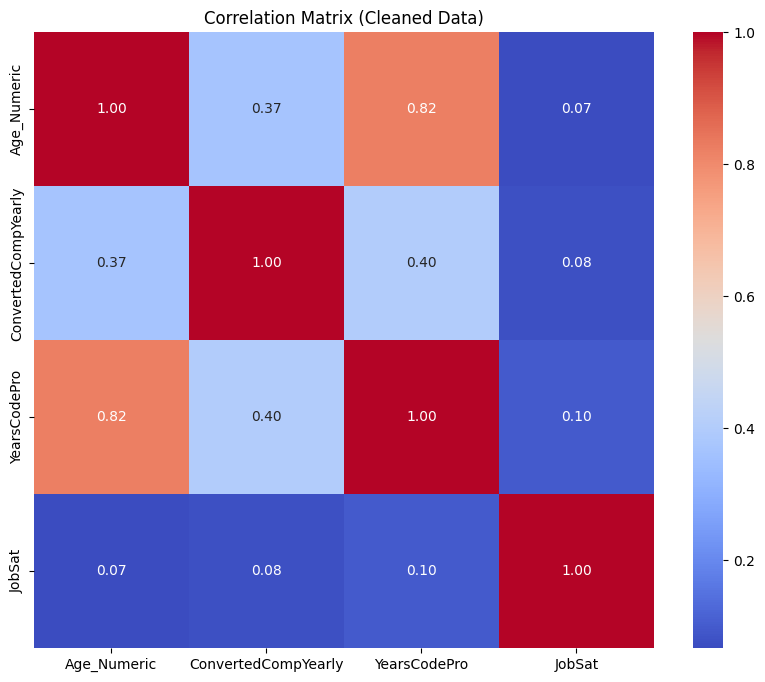

In [9]:

df_no_outliers['YearsCodePro'] = df_no_outliers['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

df_no_outliers['YearsCodePro'] = pd.to_numeric(df_no_outliers['YearsCodePro'], errors='coerce')

numeric_df = df_no_outliers[['Age_Numeric', 'ConvertedCompYearly', 'YearsCodePro', 'JobSat']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()


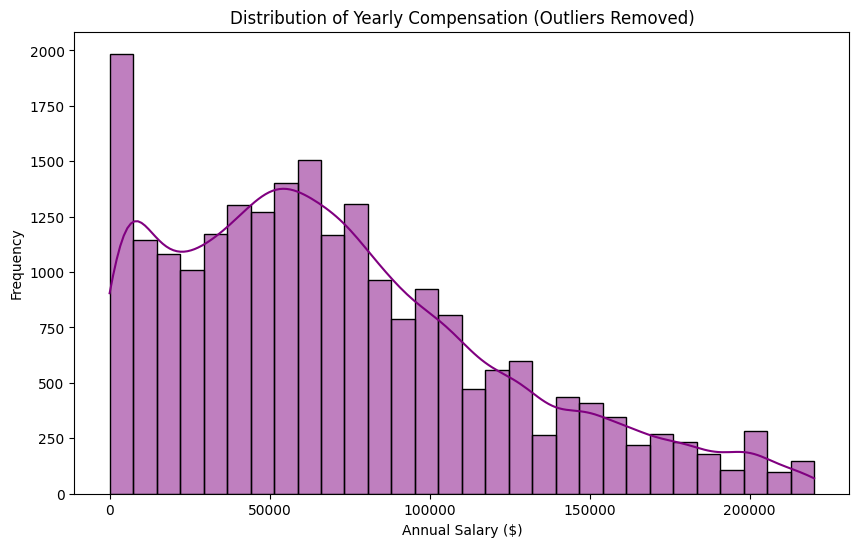

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['ConvertedCompYearly'], bins=30, kde=True, color='purple')

plt.title('Distribution of Yearly Compensation (Outliers Removed)')
plt.xlabel('Annual Salary ($)')
plt.ylabel('Frequency')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


In [11]:
df_no_outliers.to_csv('Cleaned_Salary_Data.csv', index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
